In [23]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)
import matplotlib.pyplot as plt
import numpy as np
import random as ran
%matplotlib inline

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


In [24]:
import tensorflow as tf
tf.reset_default_graph()

In [25]:
def TRAIN_SIZE(num):
    print ('Total Training Images in Dataset = ' + str(mnist.train.images.shape))
    print ('--------------------------------------------------')
    x_train = mnist.train.images[:num,:]
    print ('x_train Examples Loaded = ' + str(x_train.shape))
    y_train = mnist.train.labels[:num,:]
    print ('y_train Examples Loaded = ' + str(y_train.shape))
    print('')
    return x_train, y_train

def TEST_SIZE(num):
    print ('Total Test Examples in Dataset = ' + str(mnist.test.images.shape))
    print ('--------------------------------------------------')
    x_test = mnist.test.images[:num,:]
    print ('x_test Examples Loaded = ' + str(x_test.shape))
    y_test = mnist.test.labels[:num,:]
    print ('y_test Examples Loaded = ' + str(y_test.shape))
    return x_test, y_test

def display_digit(num):
    print(y_train[num])
    label = y_train[num].argmax(axis=0)
    image = x_train[num].reshape([28,28])
    plt.title('Example: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()
        
def display_mult_flat(start, stop):
    images = x_train[start].reshape([1,784])
    for i in range(start+1,stop):
        images = np.concatenate((images, x_train[i].reshape([1,784])))
    plt.imshow(images, cmap=plt.get_cmap('gray_r'))
    plt.show()
    

In [26]:
x_train, y_train = TRAIN_SIZE(55000)

Total Training Images in Dataset = (55000, 784)
--------------------------------------------------
x_train Examples Loaded = (55000, 784)
y_train Examples Loaded = (55000, 10)



[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


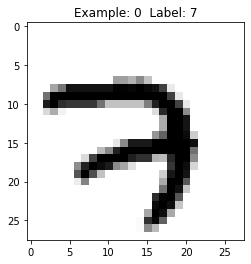

In [27]:
display_digit(0)

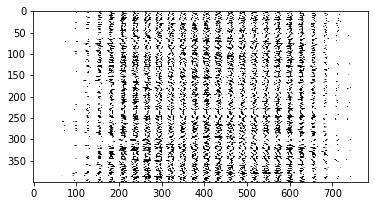

In [28]:
display_mult_flat(0,400)

In [29]:
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))
y = tf.nn.softmax(tf.matmul(x,W) + b)
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

In [30]:
x_train, y_train = TRAIN_SIZE(5500)
x_test, y_test = TEST_SIZE(10000)
LEARNING_RATE = 0.05
TRAIN_STEPS = 1000

logs_path = '/tmp/tensorflow_logs/example/'

sess = tf.Session()
init = tf.initialize_all_variables()
sess.run(init)

Total Training Images in Dataset = (55000, 784)
--------------------------------------------------
x_train Examples Loaded = (5500, 784)
y_train Examples Loaded = (5500, 10)

Total Test Examples in Dataset = (10000, 784)
--------------------------------------------------
x_test Examples Loaded = (10000, 784)
y_test Examples Loaded = (10000, 10)


In [31]:
training = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [32]:
# Summary zun Darstellen von Loss
tf.summary.scalar("loss", cross_entropy)
# Summary zum Darstellen von Accuracy
tf.summary.scalar("accuracy", accuracy)
# Accuracy und Loss vereinigen
merged_summary_op = tf.summary.merge_all()

In [33]:
summary_writer = tf.summary.FileWriter(logs_path, graph=tf.get_default_graph())
for i in range(TRAIN_STEPS+1):
    _, c, summary = sess.run([training, cross_entropy, merged_summary_op], feed_dict={x: x_train, y_: y_train})
    summary_writer.add_summary(summary, i * TRAIN_STEPS)
    if i%100 == 0:
        print('Training Step:' + str(i) + '  Accuracy =  ' + str(sess.run(accuracy, feed_dict={x: x_test, y_: y_test})) + '  Loss = ' + str(sess.run(cross_entropy, {x: x_train, y_: y_train})))
    

Training Step:0  Accuracy =  0.5988  Loss = 2.2444758
Training Step:100  Accuracy =  0.8408  Loss = 0.76828074
Training Step:200  Accuracy =  0.8645  Loss = 0.5821602
Training Step:300  Accuracy =  0.8738  Loss = 0.50489426
Training Step:400  Accuracy =  0.8789  Loss = 0.46047613
Training Step:500  Accuracy =  0.8827  Loss = 0.43072155
Training Step:600  Accuracy =  0.8863  Loss = 0.40892828
Training Step:700  Accuracy =  0.8883  Loss = 0.39200604
Training Step:800  Accuracy =  0.8905  Loss = 0.37831423
Training Step:900  Accuracy =  0.8924  Loss = 0.36689442
Training Step:1000  Accuracy =  0.8942  Loss = 0.35714442


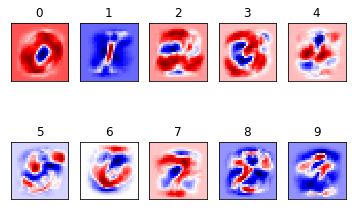

In [34]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    weight = sess.run(W)[:,i]
    plt.title(i)
    plt.imshow(weight.reshape([28,28]), cmap=plt.get_cmap('seismic'))
    frame1 = plt.gca()
    frame1.axes.get_xaxis().set_visible(False)
    frame1.axes.get_yaxis().set_visible(False) 
plt.show()

Total Training Images in Dataset = (55000, 784)
--------------------------------------------------
x_train Examples Loaded = (1, 784)
y_train Examples Loaded = (1, 10)

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


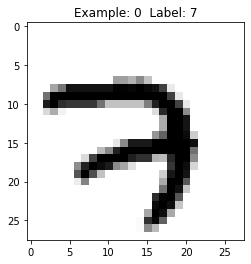

In [35]:
x_train, y_train = TRAIN_SIZE(1) 
display_digit(0)

In [36]:
answer = sess.run(y, feed_dict={x: x_train})
print(answer)

[[7.84183387e-04 1.39475203e-04 1.03379965e-01 1.08466409e-02
  8.94108880e-03 3.04531452e-04 2.12698220e-03 7.84142733e-01
  1.39988707e-02 7.53355622e-02]]


In [37]:
answer.argmax()

7

In [38]:
def display_compare(num):
    # THIS WILL LOAD ONE TRAINING EXAMPLE
    x_train = mnist.train.images[num,:].reshape(1,784)
    y_train = mnist.train.labels[num,:]
    
    # THIS GETS OUR LABEL AS A INTEGER
    label = y_train.argmax()
    
    # THIS GETS OUR PREDICATION AS A INTEGER
    prediction = sess.run(y, feed_dict={x: x_train}).argmax() 
    
    plt.title('Prediction: %d Label: %d' % (prediction, label))
    plt.imshow(x_train.reshape([28,28]), cmap=plt.get_cmap('gray_r'))
    plt.show()
    

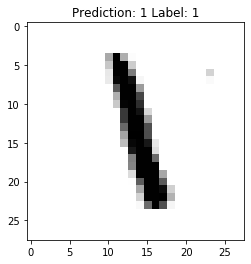

In [39]:
display_compare(ran.randint(0, 55000))


In [40]:
print("Run the command line:\n" \
          "--> tensorboard --logdir=/tmp/tensorflow_logs " \
          "\nThen open localhost:6006/ into your web browser")


Run the command line:
--> tensorboard --logdir=/tmp/tensorflow_logs 
Then open localhost:6006/ into your web browser
